<a href="https://colab.research.google.com/github/harishmuh/Deep-Learning_study/blob/main/Normalisation_%26_Augmentation_CIFAR_10_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
## **Data Preprocessing: Normalization & Augmentation - CIFAR-10 dataset**
---

### **Context**

Data preprocessing is the transformation of raw data into a format suitable for training a neural network.
This process is crucial step before conducting modeling. Data preprocessing can enhance data quality, reduce noise, ensure the data format are align with model, and improve generalization. Without proper data preprocessing, models are prone to overfitting, slow convergence or fail to learn the right pattern.

Data preprocessing depends on data type, whether images, tabular data, text, or time-series data. In this tutorial, We focus mainly on image preprocessing.

In this case, we will focus on preprocessing technique such as

1. **Normalization**
    * Normalization rescales input values to a smaller, consistent range, and more stabile for model processing.
    * Why normalize? Neural networks are sensitive to input scale. Large pixel values → large gradients

2.  **Data augmentation**
    * Data augmentation artificially increases dataset size by generating modified versions of existing samples. Data augmentation artificially increases dataset size by generating modified versions of existing samples.
    * Why use augmentation? Deep learning models require large datasets. If the dataset is small, overfitting may occur because models are memorizing traning data. In contrast, this augmentation introduces variability that may force model to learn usefull patterns.

There are some common preprocessing techniques for basic image classification

| Technique          | Purpose                |
| ------------------ | ---------------------- |
| Rotation           | Orientation invariance |
| Horizontal Flip    | Mirror invariance      |
| Zoom               | Scale robustness       |
| Width/Height Shift | Translation invariance |
| Brightness change  | Lighting robustness    |
| Random crop        | Focus learning         |




In this notebook, we will learn about data prepocessing step using CIFAR-10 image dataset. Our previous classification task with CIFAR-10 image dataset can be seen in this [link](https://github.com/harishmuh/Deep-Learning_study/blob/main/CNN_CIFAR_10.ipynb).

### **About CIFAR-10 dataset**

CIFAR-10 contains:

* 60,000 color images

* 32 × 32 pixels

* 3 color channels (RGB)

* 10 object classes (airplane, car, bird, cat, deer, dog, frog, horse, ship, truck)

![image](https://www.researchgate.net/profile/Abien-Fred-Agarap/publication/337731039/figure/fig3/AS:832268801171466@1575439753171/Figure-from-9-The-CIFAR-10-dataset-is-a-benchmark-image-classification-dataset-with-10.ppm)

### **Initial setup**

**Importing libraries**

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

**Loading dataset**

In [2]:
# Loading dataset CIFAR-10
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

**Checking data shape**

In [3]:
# Train data
X_train.shape

(50000, 32, 32, 3)

In [4]:
# Test data
X_test.shape

(10000, 32, 32, 3)

So, 50000 data will be used as training images and 10000 data will be used as testing images. The image width will be 32 x 32 (pixels). The last score of 3 represents the RGB color.

**Verifying the data**

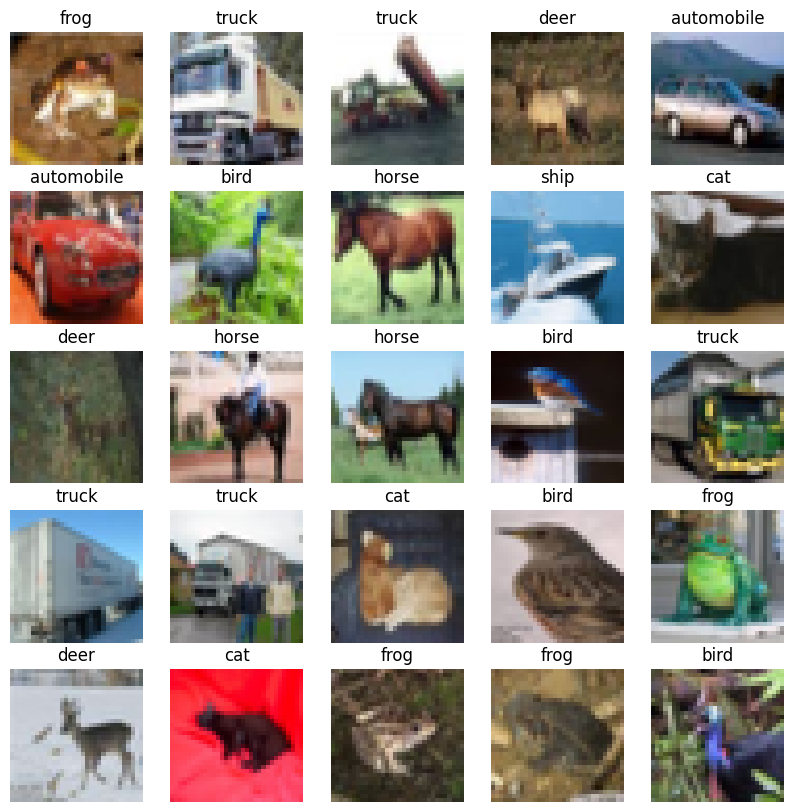

In [5]:
# Verifying the data
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


# Displaying six images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i], cmap='gray')
    # The CIFAR labels happen to be arrays, # we need the extra index
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.show()

### **Data Preprocessing**

In this step, we will implement normalization and data augmentation.

**Normalization**

In [6]:
# Normalization (0–255 → 0–1)
X_train = X_train / 255.0
X_test = X_test / 255.0

**Data Augmentation**

In [7]:
# Creating augmentation generator
datagen = ImageDataGenerator(
    rotation_range=20,        # 20 degree of rotation
    width_shift_range=0.2,    # Horizontal 20%
    height_shift_range=0.2,   # Vertical 20%
    horizontal_flip=True,     # Flipping image horizontally
    zoom_range= 0.2           # 20% random zoom
)

In [8]:
# Displaying image before and after augmentation
sample_image = X_train[0]
# Preprocess into suitable dimension for generator
sample_image = np.expand_dims(sample_image, axis=0)
#sample_image

<function matplotlib.pyplot.show(close=None, block=None)>

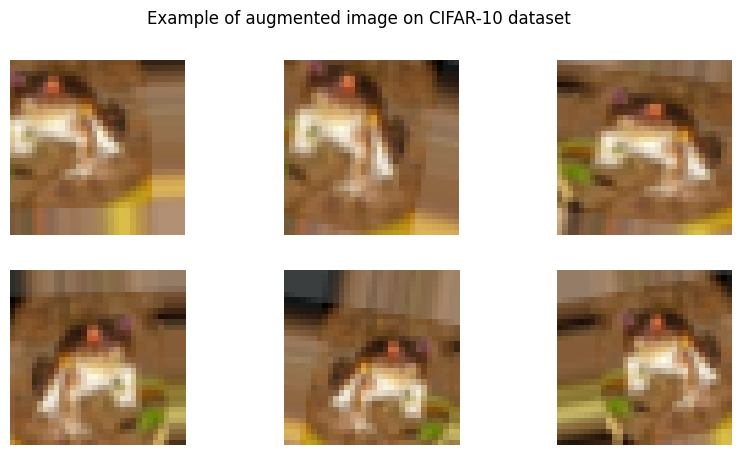

In [9]:
# Displaying some results of augmentation process
plt.figure(figsize=(10,5))
for i, augmented_image in enumerate(datagen.flow(sample_image, batch_size=1)):
  if i == 6:
    break # Only display 6 augmented image
  plt.subplot(2,3,i+1)
  plt.imshow(augmented_image[0])
  plt.axis('off')
plt.suptitle('Example of augmented image on CIFAR-10 dataset')
plt.show

We can see the result of augmentation image.

In [10]:
# Implementing data augmentation on training data
datagen.fit(X_train)

### **Model building**

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. The color_channels of 3 refers to (R,G,B).

In [11]:
# Define model architecture
model = keras.Sequential([

    # First Convolution Block
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2,2)),

    # Second Convolution Block
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),

    # Flattening
    keras.layers.Flatten(),

    # Fully Connected Layer
    keras.layers.Dense(128, activation='relu'),

    # Output Layer (10 classes)
    keras.layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### **Compiling model**

In [12]:
# Compiling model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Summarizing model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

We have about 315722 parameters to train.

### **Model training**

In [13]:
# Model training with augmentation
historyCNN = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    epochs=30,
    validation_data=(X_test, y_test)
)

Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 63s 78ms/step - accuracy: 0.2952 - loss: 1.9093 - val_accuracy: 0.4705 - val_loss: 1.4444
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 65s 83ms/step - accuracy: 0.4452 - loss: 1.5358 - val_accuracy: 0.5578 - val_loss: 1.2529
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 62s 79ms/step - accuracy: 0.4897 - loss: 1.4264 - val_accuracy: 0.5901 - val_loss: 1.1552
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 61s 78ms/step - accuracy: 0.5182 - loss: 1.3449 - val_accuracy: 0.5797 - val_loss: 1.2057
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 61s 79ms/step - accuracy: 0.5391 - loss: 1.2857 - val_accuracy: 0.6194 - val_loss: 1.0721
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 75ms/step - accuracy: 0.5517 - loss: 1.2542 - val_accuracy: 0.6151 - val_loss: 1.0771
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 57s 72ms/step - accuracy: 0.5697 - loss: 1.2170 - val_accuracy: 0.6020 - val_loss: 1.1320
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 56s 71ms/step - accuracy: 0.5806 - loss: 1.1829 - val_accurac

### **Model Evaluation**

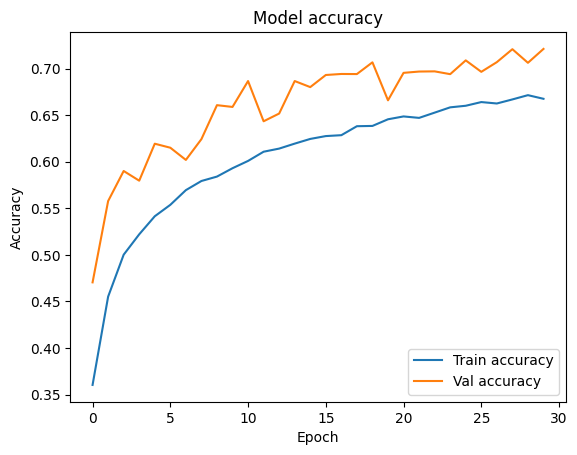

In [14]:
# Plotting accuracy
plt.plot(historyCNN.history['accuracy'])
plt.plot(historyCNN.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train accuracy', 'Val accuracy'], loc='lower right')
plt.show()

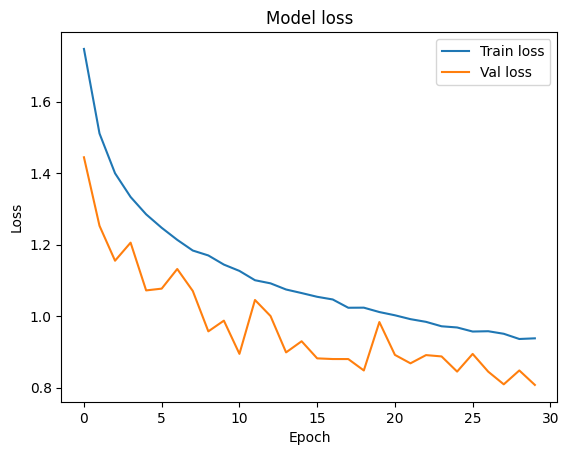

In [15]:
# Plotting loss
plt.plot(historyCNN.history['loss'])
plt.plot(historyCNN.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train loss', 'Val loss'], loc='upper right')
plt.show()

In [16]:
# Model evaluation
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Test Accuracy: {test_acc:.4f}')

313/313 - 3s - 8ms/step - accuracy: 0.7212 - loss: 0.8078
Test Accuracy: 0.7212


 We get accuracy of 72%. This score is higher than our [previous work](https://github.com/harishmuh/Deep-Learning_study/blob/main/CNN_CIFAR_10.ipynb) (without data augmentation) with accuracy of 69%. This demonstrates the model improvement performance by conducting data augmentation.

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


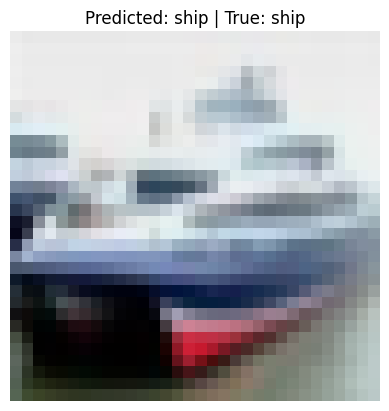

In [19]:
# Prediction and display result
predictions = model.predict(X_test)

sample_index = 1
predicted_class = np.argmax(predictions[sample_index])
true_class = y_test[sample_index][0]

plt.imshow(X_test[sample_index])
plt.title(f"Predicted: {class_names[predicted_class]} | True: {class_names[true_class]}")
plt.axis("off")
plt.show()

**Conclusion**

We have successfully conducted normalization and data augmentation steps. we get accuracy of 72%.

**Takeaways**

* Normalization improves training stability and convergence.

* Data augmentation can benefit models such as
  * Increasing the number of training data without adding more data
  * Supporting the model to learn broader variations to reduce overfitting
  * Improving model performance with different condition such as different lighting and rotation angles.